In [1]:
#library(Seurat)
library(dplyr)
library(ggplot2)
library(tibble)
library(tidyr)
library(stringr)
set.seed(1234)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/share/home/zhanglab/user/chenguangji/01.project/03.B10K_Beak/10.New_RBG_test/00_Enrichment_Test")

### Test RGB model sites

In [3]:
### RGB stat
RBG_all<-read.table("./RGB_site.txt",header=T)
#print("Totol Site Number")
#length(unique(RBG_all$feature))
RBG_all$geneid=paste0("GALGAL-",str_split_fixed(RBG_all$feature,"_",3)[,2])

RBG_all_gene<-unique(paste0("GALGAL-",str_split_fixed(RBG_all$feature,"_",3)[,2]))
#print("Totol Gene Number")
#length(RBG_all_gene)

RGB.stat.df<-merge(data.frame(table(RBG_all$note)),
                   data.frame(table((unique(RBG_all %>% select("note","geneid")))$note)),
                   by.x="Var1",by.y="Var1")
names(RGB.stat.df)<-c("type","Site Number","Gene Number")
RGB.stat.df$type=as.character(RGB.stat.df$type)
RGB.stat.df[4,]=c("Totol_RGB",length(unique(RBG_all$feature)),length(RBG_all_gene))

RGB.stat.df

,type,Site Number,Gene Number
,<chr>,<chr>,<chr>
1,BD,2111,1413
2,BL,2076,1431
3,BW,2144,1399
4,Totol_RGB,5520,2877


In [5]:
### RGB All AverageExpression (CPM)
#all_cpm<-read.csv("./All_AverageExpression_gene.csv")
all_cpm<-read.csv("./All_AverageExpression_gene_15881.csv",row.names=1)
names(all_cpm)<-c("geneid","HH29_Beak","HH30_Beak","HH36_Beak","HH38_Beak")
#head(all_cpm)

### High expression
HH29_beak_highexpression<-read.csv("./HH29beak_high_expression_genes.csv")
HH30_beak_highexpression<-read.csv("./HH30beak_high_expression_genes.csv")

HH36_beak_highexpression<-read.csv("./HH36beak_high_expression_genes.csv")
HH38_beak_highexpression<-read.csv("./HH38beak_high_expression_genes.csv")

### highly variable genes
HH29_beak_highvariable<-read.csv("./HH29beak_highly_variable_genes.csv")
HH30_beak_highvariable<-read.csv("./HH30beak_highly_variable_genes.csv")

HH36_beak_highvariable<-read.csv("./HH36beak_highly_variable_genes.csv")
HH38_beak_highvariable<-read.csv("./HH38beak_highly_variable_genes.csv")

### Differential expression gene
HH2930_HH3638_beak_DEG<-read.csv("./HH2930_HH3638_Beak_volcano_data.csv") %>% filter(Signif!="not significant")

In [6]:
### AverageExpression (CPM)
stat_CPM <- function(df,cutoff=1) {
  gene_num=dim(df)[1]
  #Exp_HH29E=table(df$HH29_Wholeembryo>cutoff)[["TRUE"]]
  Exp_HH29B=table(df$HH29_Beak>cutoff)[["TRUE"]]
  Exp_HH30B=table(df$HH30_Beak>cutoff)[["TRUE"]]
  Exp_HH36B=table(df$HH36_Beak>cutoff)[["TRUE"]]
  Exp_HH38B=table(df$HH38_Beak>cutoff)[["TRUE"]]
  beak_expression<-unique(c(df$geneid[df$HH29_Beak>cutoff],df$geneid[df$HH30_Beak>cutoff],
                            df$geneid[df$HH36_Beak>cutoff],df$geneid[df$HH38_Beak>cutoff]))
  return(list(stat=c(gene_num,#Exp_HH29E,
                     Exp_HH29B,Exp_HH30B,Exp_HH36B,Exp_HH38B,
                     length(beak_expression)),
              beakGene=beak_expression))
}

stat_CPM(all_cpm)$stat
stat_CPM(all_cpm %>% filter(geneid %in% RBG_all_gene) )$stat

### High expression
stat_highexp <- function(df,cutoff=1) {
  gene_num=dim(df)[1]  
  #Exp_HH29E=dim(df[df$HH29_Wholeembryo>cutoff,] %>% filter(geneid %in% HH29_embryo_highexpression$gene))[1]
  Exp_HH29B=dim(df[df$HH29_Beak>cutoff,] %>% filter(geneid %in% HH29_beak_highexpression$gene))[1]
  Exp_HH30B=dim(df[df$HH30_Beak>cutoff,] %>% filter(geneid %in% HH30_beak_highexpression$gene))[1]
  Exp_HH36B=dim(df[df$HH36_Beak>cutoff,] %>% filter(geneid %in% HH36_beak_highexpression$gene))[1]
  Exp_HH38B=dim(df[df$HH38_Beak>cutoff,] %>% filter(geneid %in% HH38_beak_highexpression$gene))[1]
  
  beak_expression<-unique(c((df[df$HH29_Beak>cutoff,] %>% filter(geneid %in% HH29_beak_highexpression$gene))$geneid,
                            (df[df$HH30_Beak>cutoff,] %>% filter(geneid %in% HH30_beak_highexpression$gene))$geneid,
                            (df[df$HH36_Beak>cutoff,] %>% filter(geneid %in% HH36_beak_highexpression$gene))$geneid,
                            (df[df$HH38_Beak>cutoff,] %>% filter(geneid %in% HH38_beak_highexpression$gene))$geneid))
  return(list(stat=c(gene_num,#Exp_HH29E,
                     Exp_HH29B,Exp_HH30B,Exp_HH36B,Exp_HH38B,
                     length(beak_expression)),
              beakGene=beak_expression))
}

stat_highexp(all_cpm)$stat
stat_highexp(all_cpm %>% filter(geneid %in% RBG_all_gene) )$stat

### highly variable genes
stat_highvar <- function(df,cutoff=1) {
  gene_num=dim(df)[1]  
  #Exp_HH29E=dim(df[df$HH29_Wholeembryo>cutoff,] %>% filter(X %in% HH29_embryo_highvariable$gene))[1]
  Exp_HH29B=dim(df[df$HH29_Beak>cutoff,] %>% filter(geneid %in% HH29_beak_highvariable$gene))[1]
  Exp_HH30B=dim(df[df$HH30_Beak>cutoff,] %>% filter(geneid %in% HH30_beak_highvariable$gene))[1]
  Exp_HH36B=dim(df[df$HH36_Beak>cutoff,] %>% filter(geneid %in% HH36_beak_highvariable$gene))[1]
  Exp_HH38B=dim(df[df$HH38_Beak>cutoff,] %>% filter(geneid %in% HH38_beak_highvariable$gene))[1]
  
  beak_expression<-unique(c((df[df$HH29_Beak>cutoff,] %>% filter(geneid %in% HH29_beak_highvariable$gene))$geneid,
                            (df[df$HH30_Beak>cutoff,] %>% filter(geneid %in% HH30_beak_highvariable$gene))$geneid,
                            (df[df$HH36_Beak>cutoff,] %>% filter(geneid %in% HH36_beak_highvariable$gene))$geneid,
                            (df[df$HH38_Beak>cutoff,] %>% filter(geneid %in% HH38_beak_highvariable$gene))$geneid))
  return(list(stat=c(gene_num,#Exp_HH29E,
                     Exp_HH29B,Exp_HH30B,Exp_HH36B,Exp_HH38B,
                     length(beak_expression)),
              beakGene=beak_expression))
}

stat_highvar(all_cpm)$stat
stat_highvar(all_cpm %>% filter(geneid %in% RBG_all_gene) )$stat

### beak development-period specific gene
stat_specific_onlybeak <- function(df_pre,cutoff=1) {
  df.tmp=df_pre %>% select("HH29_Beak","HH30_Beak","HH36_Beak","HH38_Beak")
  df.tmp[df.tmp<cutoff]=NA ### cut-off CPM < 1
  df=cbind.data.frame(df_pre[,1],df.tmp)
  names(df)[1]="gene"
  df=df %>% select("gene","HH29_Beak","HH30_Beak","HH36_Beak","HH38_Beak")
  gene_num=dim(df)[1]  
  
  Exp_HH29B=dim((df %>% filter(HH29_Beak>0) %>% filter(rowSums(is.na(.)) >= 3)))[1]
  Exp_HH30B=dim((df %>% filter(HH30_Beak>0) %>% filter(rowSums(is.na(.)) >= 3)))[1]
  Exp_HH36B=dim((df %>% filter(HH36_Beak>0) %>% filter(rowSums(is.na(.)) >= 3)))[1]
  Exp_HH38B=dim((df %>% filter(HH38_Beak>0) %>% filter(rowSums(is.na(.)) >= 3)))[1]
  
  beak_expression<-unique(c((df %>% filter(HH29_Beak>0) %>% filter(rowSums(is.na(.)) >= 3))$gene,
                            (df %>% filter(HH30_Beak>0) %>% filter(rowSums(is.na(.)) >= 3))$gene,
                            (df %>% filter(HH36_Beak>0) %>% filter(rowSums(is.na(.)) >= 3))$gene,
                            (df %>% filter(HH38_Beak>0) %>% filter(rowSums(is.na(.)) >= 3))$gene))
  return(list(stat=c(gene_num,Exp_HH29B,Exp_HH30B,Exp_HH36B,Exp_HH38B,length(beak_expression)),beakGene=beak_expression))
}

stat_specific_onlybeak(all_cpm)$stat
stat_specific_onlybeak(all_cpm %>% filter(geneid %in% RBG_all_gene) )$stat

### Differential expression gene
stat_DEG <- function(df) {
  gene_num=dim(df)[1]  
  #Exp_HH29_BtoE=dim(df %>% filter(geneid %in% HH29_beak_to_embryo_DEG$gene))[1]
  #Exp_HH29303638_BtoE=dim(df %>% filter(geneid %in% HH29303638_beak_to_embryo_DEG$gene))[1]
  Exp_HH2930_H3638_B=dim(df %>% filter(geneid %in% HH2930_HH3638_beak_DEG$gene))[1]
  
  beak_expression<-unique(c(#(df %>% filter(geneid %in% HH29_beak_to_embryo_DEG$gene))$geneid,
                            #(df %>% filter(geneid %in% HH29303638_beak_to_embryo_DEG$gene))$geneid,
                            (df %>% filter(geneid %in% HH2930_HH3638_beak_DEG$gene))$geneid))
  return(list(stat=c(gene_num,#Exp_HH29_BtoE,Exp_HH29303638_BtoE,
                     Exp_HH2930_H3638_B,length(beak_expression)),beakGene=beak_expression))
}
stat_DEG(all_cpm)$stat
stat_DEG(all_cpm %>% filter(geneid %in% RBG_all_gene) )$stat


[1] 15881  3259  2940  4425  3188  4913

[1] 2877  648  577  929  614 1028

[1] 15881  1824  1777  1909  1712  2975

[1] 2877  390  370  411  337  642

[1] 15881   410   424   460   453   796

[1] 2877   88   95   97   96  166

[1] 15881    90    78   833   209  1210

[1] 2877   18   14  197   46  275

[1] 15881  4635  4635

[1] 2877  928  928

In [7]:
all_cpm_beakGene <- unique(all_cpm %>% filter(geneid %in% stat_CPM(all_cpm)$beakGene))
dim(all_cpm_beakGene)
head(all_cpm_beakGene)

all_cpm_RBG_all_gene <- all_cpm_beakGene %>% filter(geneid %in% RBG_all_gene)
all_cpm_RBG_all_gene[sapply(all_cpm_RBG_all_gene, is.infinite)] <- NA
dim(all_cpm_RBG_all_gene)
head(all_cpm_RBG_all_gene)
#write.csv(all_cpm_RBG_all_gene,"././RGB_Sites_Beak_cpm_HH2930_HH3638_20240731_for_heatmap.csv")

[1] 4913    5

,geneid,HH29_Beak,HH30_Beak,HH36_Beak,HH38_Beak
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,GALGAL-R00005,6.973376e+04,2.470418e+05,1.201461e+05,1.788498e+08
2,GALGAL-R00007,5.911114e-01,6.596009e-01,1.210512e+00,3.735982e-01
3,GALGAL-R00009,6.938090e-01,2.783748e+00,1.862883e+00,6.137192e-01
4,GALGAL-R00015,3.944034e-01,3.054408e-01,1.032083e+00,2.211428e-01
5,GALGAL-R00016,1.002269e-02,4.841957e-03,3.030301e-01,2.043245e+01
6,GALGAL-R00018,2.430139e+00,3.560830e+00,7.791379e+00,3.570343e+00


[1] 1028    5

,geneid,HH29_Beak,HH30_Beak,HH36_Beak,HH38_Beak
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,GALGAL-R00025,1.133428e+00,7.840971e-01,2.122389e+00,0.8999302
2,GALGAL-R00030,2.930753e-01,2.693563e-01,8.752056e+00,147.2110994
3,GALGAL-R00054,1.621757e+00,1.173708e+00,2.745157e+00,3.1385786
4,GALGAL-R00107,9.949346e+14,9.057737e+27,2.741432e+21,NA
5,GALGAL-R00122,3.930259e-01,4.050412e-01,1.578150e+00,0.2756850
6,GALGAL-R00209,3.409999e+00,3.369333e+00,8.521560e+01,0.2090533


In [8]:
fisher_test_batch<-function(All,df,beak_index=6){
    all.cpm=stat_CPM(All)$stat #sc-RNA
    all.highexp=stat_highexp(All)$stat #sc-RNA
    all.highvar=stat_highvar(All)$stat #sc-RNA
    #all.specific=stat_specific(All)$stat #sc-RNA
    all.specific.ob=stat_specific_onlybeak(All)$stat #sc-RNA
    all.DEG=stat_DEG(All)$stat #sc-RNA
    
    df.cpm=stat_CPM(df)$stat
    df.highexp=stat_highexp(df)$stat
    df.highvar=stat_highvar(df)$stat
    #df.specific=stat_specific(df)$stat
    df.specific.ob=stat_specific_onlybeak(df)$stat
    df.DEG=stat_DEG(df)$stat

    # Beak cpm
    beak_all_cpm_pvalue=fisher.test(matrix(c(df.cpm[beak_index],dim(df)[1]-df.cpm[beak_index],all.cpm[beak_index]-df.cpm[beak_index], 
                                             all.cpm[1]-df.cpm[1]-all.cpm[beak_index]+df.cpm[beak_index]), 
                                           nrow = 2), alternative = "greater")[["p.value"]]
    beak_all_cpm_odd_value=fisher.test(matrix(c(df.cpm[beak_index],dim(df)[1]-df.cpm[beak_index],all.cpm[beak_index]-df.cpm[beak_index], 
                                                all.cpm[1]-df.cpm[1]-all.cpm[beak_index]+df.cpm[beak_index]), 
                                              nrow = 2), alternative = "greater")[["estimate"]][[1]]
    # Beak high-expression
    beak_all_highexp_pvalue=fisher.test(matrix(c(df.highexp[beak_index], dim(df)[1]-df.highexp[beak_index], all.highexp[beak_index]-df.highexp[beak_index], all.highexp[1]-df.highexp[1]-all.highexp[beak_index]+df.highexp[beak_index]), nrow = 2), alternative = "greater")[["p.value"]]
    beak_all_highexp_odd_value=fisher.test(matrix(c(df.highexp[beak_index], dim(df)[1]-df.highexp[beak_index], all.highexp[beak_index]-df.highexp[beak_index], all.highexp[1]-df.highexp[1]-all.highexp[beak_index]+df.highexp[beak_index]), nrow = 2), alternative = "greater")[["estimate"]][[1]]

    # Beak high-variale gene
    beak_all_highvar_pvalue=fisher.test(matrix(c(df.highvar[beak_index], dim(df)[1]-df.highvar[beak_index], all.highvar[beak_index]-df.highvar[beak_index], all.highvar[1]-df.highvar[1]-all.highvar[beak_index]+df.highvar[beak_index]), nrow = 2), alternative = "greater")[["p.value"]]
    beak_all_highvar_odd_value=fisher.test(matrix(c(df.highvar[beak_index], dim(df)[1]-df.highvar[beak_index], all.highvar[beak_index]-df.highvar[beak_index], all.highvar[1]-df.highvar[1]-all.highvar[beak_index]+df.highvar[beak_index]), nrow = 2), alternative = "greater")[["estimate"]][[1]]

    # Beak specific-only-beak
    beak_all_specific.ob_pvalue=fisher.test(matrix(c(df.specific.ob[beak_index], dim(df)[1]-df.specific.ob[beak_index], all.specific.ob[beak_index]-df.specific.ob[beak_index], all.specific.ob[1]-df.specific.ob[1]-all.specific.ob[beak_index]+df.specific.ob[beak_index]), nrow = 2), alternative = "greater")[["p.value"]]
    beak_all_specific.ob_odd_value=fisher.test(matrix(c(df.specific.ob[beak_index], dim(df)[1]-df.specific.ob[beak_index], all.specific.ob[beak_index]-df.specific.ob[beak_index], all.specific.ob[1]-df.specific.ob[1]-all.specific.ob[beak_index]+df.specific.ob[beak_index]), nrow = 2), alternative = "greater")[["estimate"]][[1]]

    # Beak DEG
    beak_all_DEG_pvalue=fisher.test(matrix(c(df.DEG[beak_index-3], dim(df)[1]-df.DEG[beak_index-3], all.DEG[beak_index-3]-df.DEG[beak_index-3], all.DEG[1]-df.DEG[1]-all.DEG[beak_index-3]+df.DEG[beak_index-3]), nrow = 2), alternative = "greater")[["p.value"]]
    beak_all_DEG_odd_value=fisher.test(matrix(c(df.DEG[beak_index-3], dim(df)[1]-df.DEG[beak_index-3], all.DEG[beak_index-3]-df.DEG[beak_index-3], all.DEG[1]-df.DEG[1]-all.DEG[beak_index-3]+df.DEG[beak_index-3]), nrow = 2), alternative = "greater")[["estimate"]][[1]]
    return(list(cpm=list(pvalue=c(beak_all_cpm_pvalue),oddvalue=c(beak_all_cpm_odd_value)),
              highexp=list(pvalue=c(beak_all_highexp_pvalue),oddvalue=c(beak_all_highexp_odd_value)),
              highvar=list(pvalue=c(beak_all_highvar_pvalue),oddvalue=c(beak_all_highvar_odd_value)),
              #specific=list(pvalue=c(beak_all_specific_pvalue),oddvalue=c(beak_all_specific_odd_value)),
              specific.ob=list(pvalue=c(beak_all_specific.ob_pvalue),oddvalue=c(beak_all_specific.ob_odd_value)),
              DEG=list(pvalue=c(beak_all_DEG_pvalue),oddvalue=c(beak_all_DEG_odd_value))))
}

In [9]:
tmp.df=as.data.frame(fisher_test_batch(all_cpm,all_cpm %>% filter(geneid %in% RBG_all_gene)))
RBG.out.all = data.frame(matrix(vector(), 0, 5,
                dimnames=list(c(), c("Type","background","pvalue","oddvalue","Simulate"))),
                stringsAsFactors=F)
i="RGB_reslut"
RBG.out.all[dim(RBG.out.all)[1]+1,] = c("cpm","RGB_model",tmp.df$cpm.pvalue[1],tmp.df$cpm.oddvalue[1],i)
RBG.out.all[dim(RBG.out.all)[1]+1,] = c("highexp","RGB_model",tmp.df$highexp.pvalue[1],tmp.df$highexp.oddvalue[1],i)
RBG.out.all[dim(RBG.out.all)[1]+1,] = c("highvar","RGB_model",tmp.df$highvar.pvalue[1],tmp.df$highvar.oddvalue[1],i)
#RBG.out.all[dim(RBG.out.all)[1]+1,] = c("specific","RGB_model",tmp.df$specific.pvalue[1],tmp.df$specific.oddvalue[1],i)
RBG.out.all[dim(RBG.out.all)[1]+1,] = c("specific.ob","RGB_model",tmp.df$specific.ob.pvalue[1],tmp.df$specific.ob.oddvalue[1],i)
RBG.out.all[dim(RBG.out.all)[1]+1,] = c("DEG","RGB_model",tmp.df$DEG.pvalue[1],tmp.df$DEG.oddvalue[1],i)
RBG.out.all

,Type,background,pvalue,oddvalue,Simulate
,<chr>,<chr>,<chr>,<chr>,<chr>
1,cpm,RGB_model,6.49004134083638e-10,1.30493267771771,RGB_reslut
2,highexp,RGB_model,5.0577406570755e-08,1.31383229890672,RGB_reslut
3,highvar,RGB_model,0.0235485967129932,1.20265971623292,RGB_reslut
4,specific.ob,RGB_model,1.42347808192663e-05,1.36419235046012,RGB_reslut
5,DEG,RGB_model,3.86997916012241e-05,1.19410739492576,RGB_reslut


In [10]:
sampleN=2877
out.all = data.frame(matrix(vector(), 0, 5,
                dimnames=list(c(), c("Type","RGB_model","pvalue","oddvalue","Simulate"))),
                stringsAsFactors=F)
pb=txtProgressBar(style=3)
times=10000
for (i in 1:times) {
    #i=1
    tmp.df<-as.data.frame(fisher_test_batch(all_cpm,
                        all_cpm %>% filter(geneid %in% all_cpm[sample(nrow(all_cpm),sampleN),1])))

    out.all[dim(out.all)[1]+1,] = c("cpm","random_test",tmp.df$cpm.pvalue[1],tmp.df$cpm.oddvalue[1],i)
    out.all[dim(out.all)[1]+1,] = c("highexp","random_test",tmp.df$highexp.pvalue[1],tmp.df$highexp.oddvalue[1],i)
    out.all[dim(out.all)[1]+1,] = c("highvar","random_test",tmp.df$highvar.pvalue[1],tmp.df$highvar.oddvalue[1],i)
    #out.all[dim(out.all)[1]+1,] = c("specific","random_test",tmp.df$specific.pvalue[1],tmp.df$specific.oddvalue[1],i)
    out.all[dim(out.all)[1]+1,] = c("specific.ob","random_test",tmp.df$specific.ob.pvalue[1],tmp.df$specific.ob.oddvalue[1],i)
    out.all[dim(out.all)[1]+1,] = c("DEG","random_test",tmp.df$DEG.pvalue[1],tmp.df$DEG.oddvalue[1],i)
    setTxtProgressBar(pb, i/length(1:times))
}
close(pb)
names(out.all)=c("Type","background","pvalue","oddvalue","Simulate")
out.all

  |======================================================================| 100%


,Type,background,pvalue,oddvalue,Simulate
,<chr>,<chr>,<chr>,<chr>,<chr>
1,cpm,random_test,0.561965546507089,0.993977386431742,1
2,highexp,random_test,0.0978322770855835,1.0713369092335,1
3,highvar,random_test,0.00437885638610908,1.27145188419539,1
4,specific.ob,random_test,0.889357104373211,0.910216655726144,1
5,DEG,random_test,0.991206259297046,0.897871638275739,1
6,cpm,random_test,0.0435450317531383,1.07971982014694,2
7,highexp,random_test,0.0214352656014537,1.11251370911869,2
8,highvar,random_test,0.339727050455629,1.0431614728054,2
9,specific.ob,random_test,0.426574268707167,1.01693055789121,2


In [11]:
write.csv(out.all,"./10000Simulate_Enrichment_result.csv")
write.csv(RBG.out.all,"./RBG_Enrichment_result.csv")

In [12]:
# --- 2. Convert 'oddvalue' columns to numeric ---
RBG.out.all$oddvalue <- as.numeric(RBG.out.all$oddvalue)
out.all$oddvalue <- as.numeric(out.all$oddvalue)

# --- 3. Calculate empirical p-values ---
# Initialize a vector to store the empirical p-values
empirical_p_values <- numeric(nrow(RBG.out.all))
names(empirical_p_values) <- RBG.out.all$Type

# Loop through each 'Type' in your observed results
for (i in 1:nrow(RBG.out.all)) {
  current_type <- RBG.out.all$Type[i]
  observed_oddvalue <- RBG.out.all$oddvalue[i]
  
  # Filter the simulation results for the current type
  simulations_for_type <- out.all[out.all$Type == current_type, ]
  
  # Get the oddvalues from these simulations
  simulated_oddvalues <- simulations_for_type$oddvalue
  
  # Number of simulations for this specific type
  n_simulations <- length(simulated_oddvalues)
  
  if (n_simulations == 0) {
    empirical_p_values[i] <- NA # Or some other indicator if no simulations found
    warning(paste("No simulations found for Type:", current_type))
    next
  }
  
  # Count how many simulated oddvalues are greater than or equal to the observed oddvalue
  # This assumes a higher oddvalue means more significant enrichment.
  count_extreme_or_more <- sum(simulated_oddvalues >= observed_oddvalue, na.rm = TRUE)
  
  # Calculate empirical p-value
  emp_p_val <- (count_extreme_or_more + 1) / (n_simulations + 1)
  empirical_p_values[i] <- emp_p_val
}

# --- 4. Add empirical p-values to your observed results data frame ---
RBG.out.all$empirical_pvalue <- empirical_p_values

# --- 5. Display the results ---
print(RBG.out.all)


         Type background               pvalue oddvalue   Simulate
1         cpm  RGB_model 6.49004134083638e-10 1.304933 RGB_reslut
2     highexp  RGB_model  5.0577406570755e-08 1.313832 RGB_reslut
3     highvar  RGB_model   0.0235485967129932 1.202660 RGB_reslut
4 specific.ob  RGB_model 1.42347808192663e-05 1.364192 RGB_reslut
5         DEG  RGB_model 3.86997916012241e-05 1.194107 RGB_reslut
  empirical_pvalue
1       0.00009999
2       0.00009999
3       0.02469753
4       0.00019998
5       0.00009999


In [13]:
RBG.out.all

,Type,background,pvalue,oddvalue,Simulate,empirical_pvalue
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,cpm,RGB_model,6.49004134083638e-10,1.304933,RGB_reslut,0.00009999
2,highexp,RGB_model,5.0577406570755e-08,1.313832,RGB_reslut,0.00009999
3,highvar,RGB_model,0.0235485967129932,1.202660,RGB_reslut,0.02469753
4,specific.ob,RGB_model,1.42347808192663e-05,1.364192,RGB_reslut,0.00019998
5,DEG,RGB_model,3.86997916012241e-05,1.194107,RGB_reslut,0.00009999


In [14]:
head(out.all)

,Type,background,pvalue,oddvalue,Simulate
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,cpm,random_test,0.561965546507089,0.9939774,1
2,highexp,random_test,0.0978322770855835,1.0713369,1
3,highvar,random_test,0.00437885638610908,1.2714519,1
4,specific.ob,random_test,0.889357104373211,0.9102167,1
5,DEG,random_test,0.991206259297046,0.8978716,1
6,cpm,random_test,0.0435450317531383,1.0797198,2


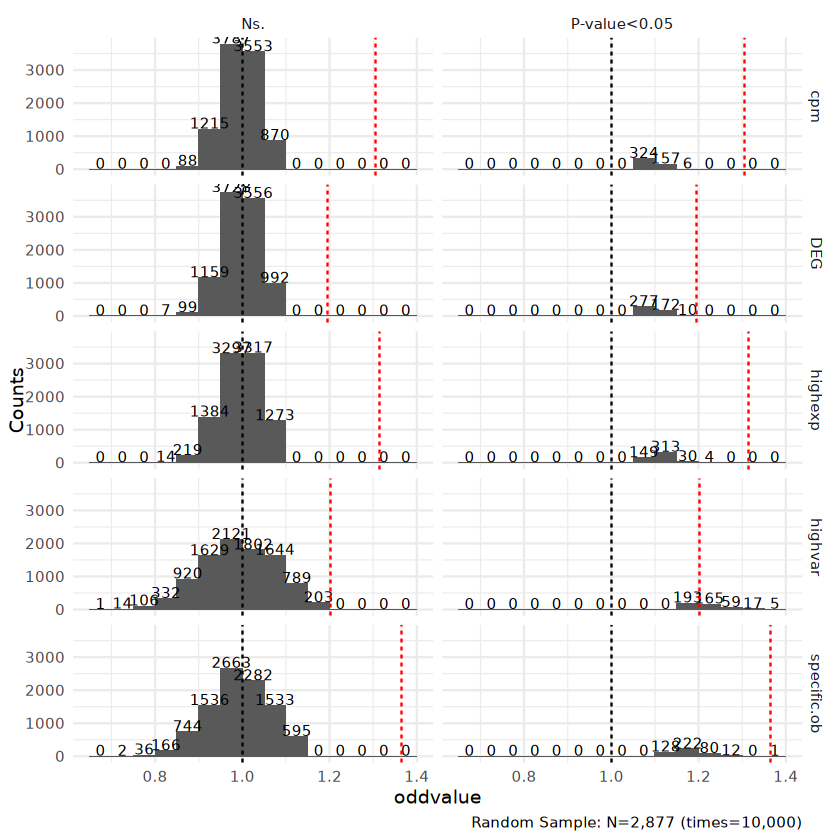

In [15]:
out.all <- out.all %>% mutate(pvalue=as.numeric(as.character(pvalue)),group=ifelse(pvalue<0.05, "P-value<0.05", "Ns."))

ggplot(out.all,aes(x=oddvalue,group=group))+
  # geom_density(aes(x=pvalue))+
  geom_histogram(binwidth=0.05,boundary=0)+
  stat_bin(aes(y=after_stat(count), label=after_stat(count)),binwidth=0.05, geom="text", vjust=-.05,boundary=0,size=3)+
  geom_vline(xintercept = 1,color="black",linetype="dashed")+
  geom_vline(data=RBG.out.all, aes(xintercept = oddvalue),color="red",linetype="dashed")+
  facet_grid(Type~group)+
  theme_minimal()+
  labs(caption = "Random Sample: N=2,877 (times=10,000)",x="oddvalue",y="Counts")
ggsave("./10000Simulate_Enrichment_result.pdf",w=5,h=7)